In [43]:
from __future__ import print_function

import sys
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/denoising-autoencoder/")
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/")

import autoencoder
import convnet

import numpy as np

import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
def corrupt_input(X):
    # TODO: Verify whether introducing noise like this is correct.
    noise = torch.FloatTensor(np.random.binomial(1, 0.5, size=X.data.size()))
    return Variable(X.data.clone() * noise)

In [7]:
trX, teX, trY, teY = convnet.load_mnist(onehot=False)

trX = np.array([x.flatten() for x in trX])
teX = np.array([x.flatten() for x in teX])

In [8]:
trX.shape, teX.shape, trY.shape, teY.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [17]:
trX = Variable(torch.FloatTensor(trX))

In [10]:
N = trX.shape[0]
d_in = 784
d_out = 500
dtype = torch.FloatTensor
batch_size = 64

In [11]:
ae = autoencoder.Autoencoder(n_visible=d_in, n_hidden=d_out, batch_size=batch_size)

In [21]:
optimizer = torch.optim.SGD(ae.parameters(), lr=0.01)
epochs = 50

In [22]:
for e in range(epochs):
    agg_cost = 0.
    num_batches = N / batch_size
    for k in range(num_batches):
        start, end = k * (batch_size), (k + 1) * batch_size
        bX = trX[start:end]
        tilde_x = corrupt_input(bX)
        optimizer.zero_grad()
        Z = ae.forward(tilde_x)
        loss = - torch.sum(bX * torch.log(Z) + (1.0 - bX) * torch.log(1.0 - Z), 1)
        cost = torch.mean(loss)
        cost.backward()
        optimizer.step()
        agg_cost += cost
    agg_cost /= num_batches
    print("epoch:", str(e) + ", cost:", agg_cost.data[0])

epoch: 0, cost: 92.1273727417
epoch: 1, cost: 91.5384902954
epoch: 2, cost: 90.9277267456
epoch: 3, cost: 90.4141616821
epoch: 4, cost: 89.9409942627
epoch: 5, cost: 89.4988861084
epoch: 6, cost: 89.2271270752
epoch: 7, cost: 88.7911376953
epoch: 8, cost: 88.4332199097
epoch: 9, cost: 88.1333465576
epoch: 10, cost: 87.7748794556
epoch: 11, cost: 87.4935302734
epoch: 12, cost: 87.2067871094
epoch: 13, cost: 86.8745574951
epoch: 14, cost: 86.6812286377
epoch: 15, cost: 86.3573760986
epoch: 16, cost: 86.1412887573
epoch: 17, cost: 85.8857574463
epoch: 18, cost: 85.6589431763
epoch: 19, cost: 85.4310379028
epoch: 20, cost: 85.1758346558
epoch: 21, cost: 84.9344100952
epoch: 22, cost: 84.747795105
epoch: 23, cost: 84.4586715698
epoch: 24, cost: 84.335067749
epoch: 25, cost: 84.1450424194
epoch: 26, cost: 83.9273757935
epoch: 27, cost: 83.671836853
epoch: 28, cost: 83.4825592041
epoch: 29, cost: 83.3244552612
epoch: 30, cost: 83.1116333008
epoch: 31, cost: 82.9613647461
epoch: 32, cost: 82.7

In [25]:
trX[0].data.size()

torch.Size([784])

In [26]:
num_batches = N / batch_size

results = []

for k in range(num_batches):
    start, end = k * (batch_size), (k + 1) * batch_size
    bX = trX[start:end]
    tilde_x = corrupt_input(bX)
    z = ae.forward(tilde_x)
    results.append(z)

In [75]:
t = results[0].data[55].numpy()

In [76]:
t = t.reshape(28, 28)

In [77]:
def imshow(img):
    if type(img) == torch.FloatTensor:
        npimg = img.numpy()
    else:
        npimg = img
    plt.imshow(np.transpose(npimg, (1, 2, 0))[:,:,0], 
               cmap='gray')

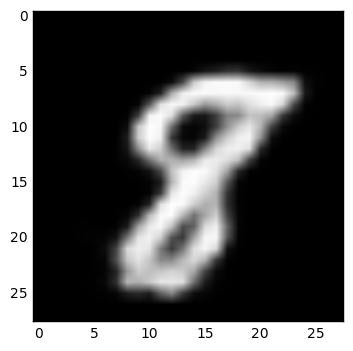

In [78]:
plt.imshow(t, cmap='gray')

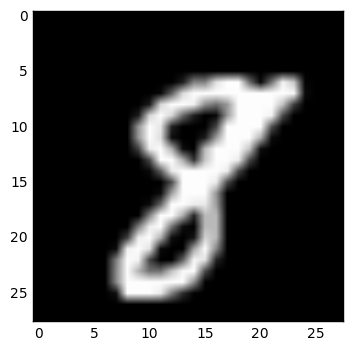

In [79]:
plt.imshow(trX.data[55].numpy().reshape(28, 28), cmap='gray')